In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import joblib

In [13]:
df = pd.read_csv("./data/Diabetes_prediction.csv")
df

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0              2  115.863387      56.410731      24.336736   94.385783   
1              2   92.490122      70.615520      23.443591  138.652426   
2              1   88.141469      63.262618      23.404364  149.358082   
3              2  108.453101      67.793632      20.751580  108.751638   
4              1  127.849443      94.725685      22.603078   25.269987   
..           ...         ...            ...            ...         ...   
995            1  103.496355      41.059401      24.930299   43.675978   
996            1   60.714150      64.082842      24.689064  111.562745   
997            0   97.597727      64.122312      22.140339  108.138552   
998            0   66.775137      55.908797      24.885274  219.521484   
999            0   87.647268      69.111593      25.621266  134.335745   

           BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0    26.455940                  0.272682  20.100494          0  
1    23.910167                  0.665160  44.912281          0  
2    21.948250                  0.676022  48.247873          1  
3    24.209304                  0.289636  42.749868          0  
4    32.997477                  0.601315  32.797789          0  
..         ...                       ...        ...        ...  
995  25.846062                  0.455884  19.905419          0  
996  19.464280                  0.250560  44.421874          1  
997  22.733052                  0.761463  58.949800          1  
998  31.819187                  0.382877  46.928923          0  
999  31.098746                  0.605828  41.785889          1  

[1000 rows x 9 columns]

In [15]:
df.head()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0

In [16]:
df.tail()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
995            1  103.496355      41.059401      24.930299   43.675978   
996            1   60.714150      64.082842      24.689064  111.562745   
997            0   97.597727      64.122312      22.140339  108.138552   
998            0   66.775137      55.908797      24.885274  219.521484   
999            0   87.647268      69.111593      25.621266  134.335745   

           BMI  DiabetesPedigreeFunction        Age  Diagnosis  
995  25.846062                  0.455884  19.905419          0  
996  19.464280                  0.250560  44.421874          1  
997  22.733052                  0.761463  58.949800          1  
998  31.819187                  0.382877  46.928923          0  
999  31.098746                  0.605828  41.785889          1

### The dataset contains the data for the following features to help us predict whether a person is diabetic or not:

    Pregnancies: Number of times pregnant

    Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    
    BloodPressure: Diastolic blood pressure (mm Hg)
    
    SkinThickness: Triceps skin fold thickness (mm)
    
    Insulin: 2-Hour serum insulin (mu U/ml)
    
    BMI: Body mass index (weight in kg/(height in m)2)
    
    DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
    
    Age: Age (years)
    
    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [18]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.000000    1000.000000    1000.000000  1000.000000   
mean      1.771000    99.440607      72.179837      23.278316    84.582679   
std       1.354398    19.470730      13.882017       1.173807    74.872733   
min       0.000000    30.571402      31.401487      19.369987  -165.310033   
25%       1.000000    86.145927      62.795447      22.501591    35.076535   
50%       2.000000    99.458362      71.909588      23.275225    84.442232   
75%       3.000000   113.264556      82.082660      24.052022   134.267842   
max       8.000000   161.238939     110.723715      26.917654   317.701852   

               BMI  DiabetesPedigreeFunction          Age   Diagnosis  
count  1000.000000               1000.000000  1000.000000  1000.00000  
mean     25.433600                  0.449383    43.281798     0.30600  
std       3.690223                  0.199334    14.465398     0.46106  
min      13.548818                  0.100037    -0.979804     0.00000  
25%      23.022715                  0.283376    33.518451     0.00000  
50%      25.455649                  0.448219    43.634273     0.00000  
75%      27.972184                  0.619158    53.098446     1.00000  
max      36.324598                  0.799654    90.573782     1.00000

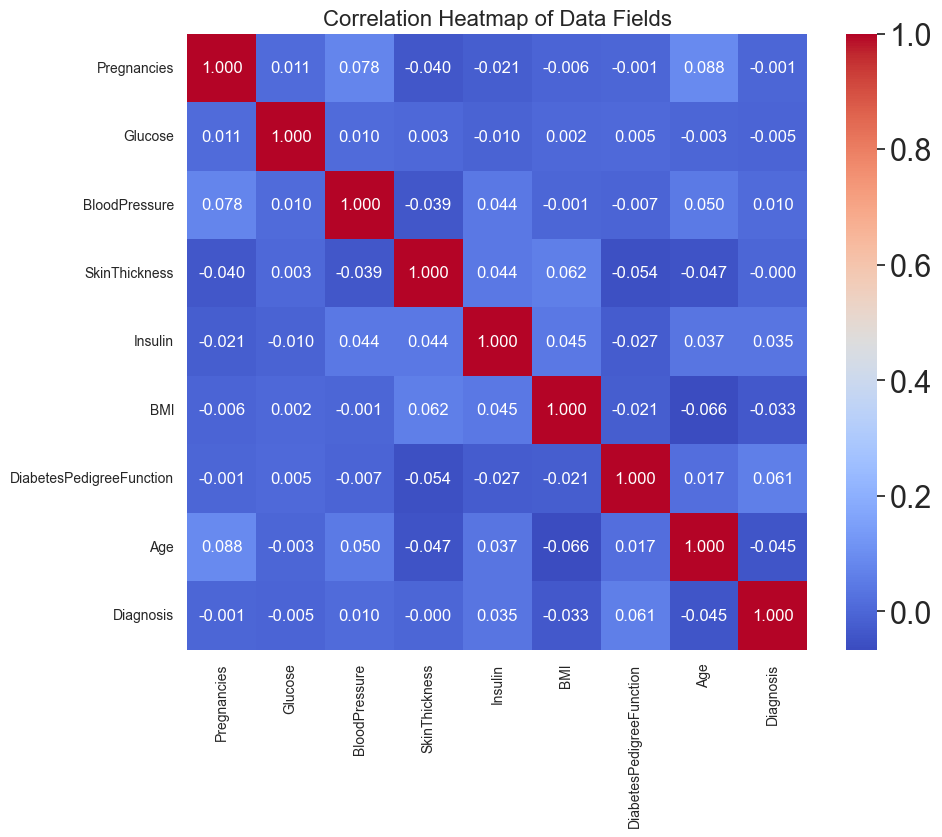

In [22]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 12})

# Add title and adjust font size
heatmap.set_title('Correlation Heatmap of Data Fields', fontsize=16)

# Adjust tick labels font size
heatmap.tick_params(axis='both', which='major', labelsize=10)

plt.show()

In [8]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.011362       0.077683      -0.040438   
Glucose                      0.011362  1.000000       0.010261       0.002874   
BloodPressure                0.077683  0.010261       1.000000      -0.038723   
SkinThickness               -0.040438  0.002874      -0.038723       1.000000   
Insulin                     -0.020708 -0.010334       0.044350       0.044425   
BMI                         -0.006228  0.002024      -0.000791       0.062209   
DiabetesPedigreeFunction    -0.001419  0.005122      -0.007349      -0.054404   
Age                          0.088453 -0.003056       0.049709      -0.047309   
Diagnosis                   -0.001484 -0.004971       0.010349      -0.000014   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.020708 -0.006228                 -0.001419   
Glucose                  -0.010334  0.002024                  0.005122   
BloodPressure             0.044350 -0.000791                 -0.007349   
SkinThickness             0.044425  0.062209                 -0.054404   
Insulin                   1.000000  0.044684                 -0.026908   
BMI                       0.044684  1.000000                 -0.020680   
DiabetesPedigreeFunction -0.026908 -0.020680                  1.000000   
Age                       0.037062 -0.066314                  0.017163   
Diagnosis                 0.035411 -0.033336                  0.060549   

                               Age  Diagnosis  
Pregnancies               0.088453  -0.001484  
Glucose                  -0.003056  -0.004971  
BloodPressure             0.049709   0.010349  
SkinThickness            -0.047309  -0.000014  
Insulin                   0.037062   0.035411  
BMI                      -0.066314  -0.033336  
DiabetesPedigreeFunction  0.017163   0.060549  
Age                       1.000000  -0.044726  
Diagnosis                -0.044726   1.000000

In [9]:
df_corr = df.corr()['Diagnosis']
df_corr

Pregnancies                -0.001484
Glucose                    -0.004971
BloodPressure               0.010349
SkinThickness              -0.000014
Insulin                     0.035411
BMI                        -0.033336
DiabetesPedigreeFunction    0.060549
Age                        -0.044726
Diagnosis                   1.000000
Name: Diagnosis, dtype: float64

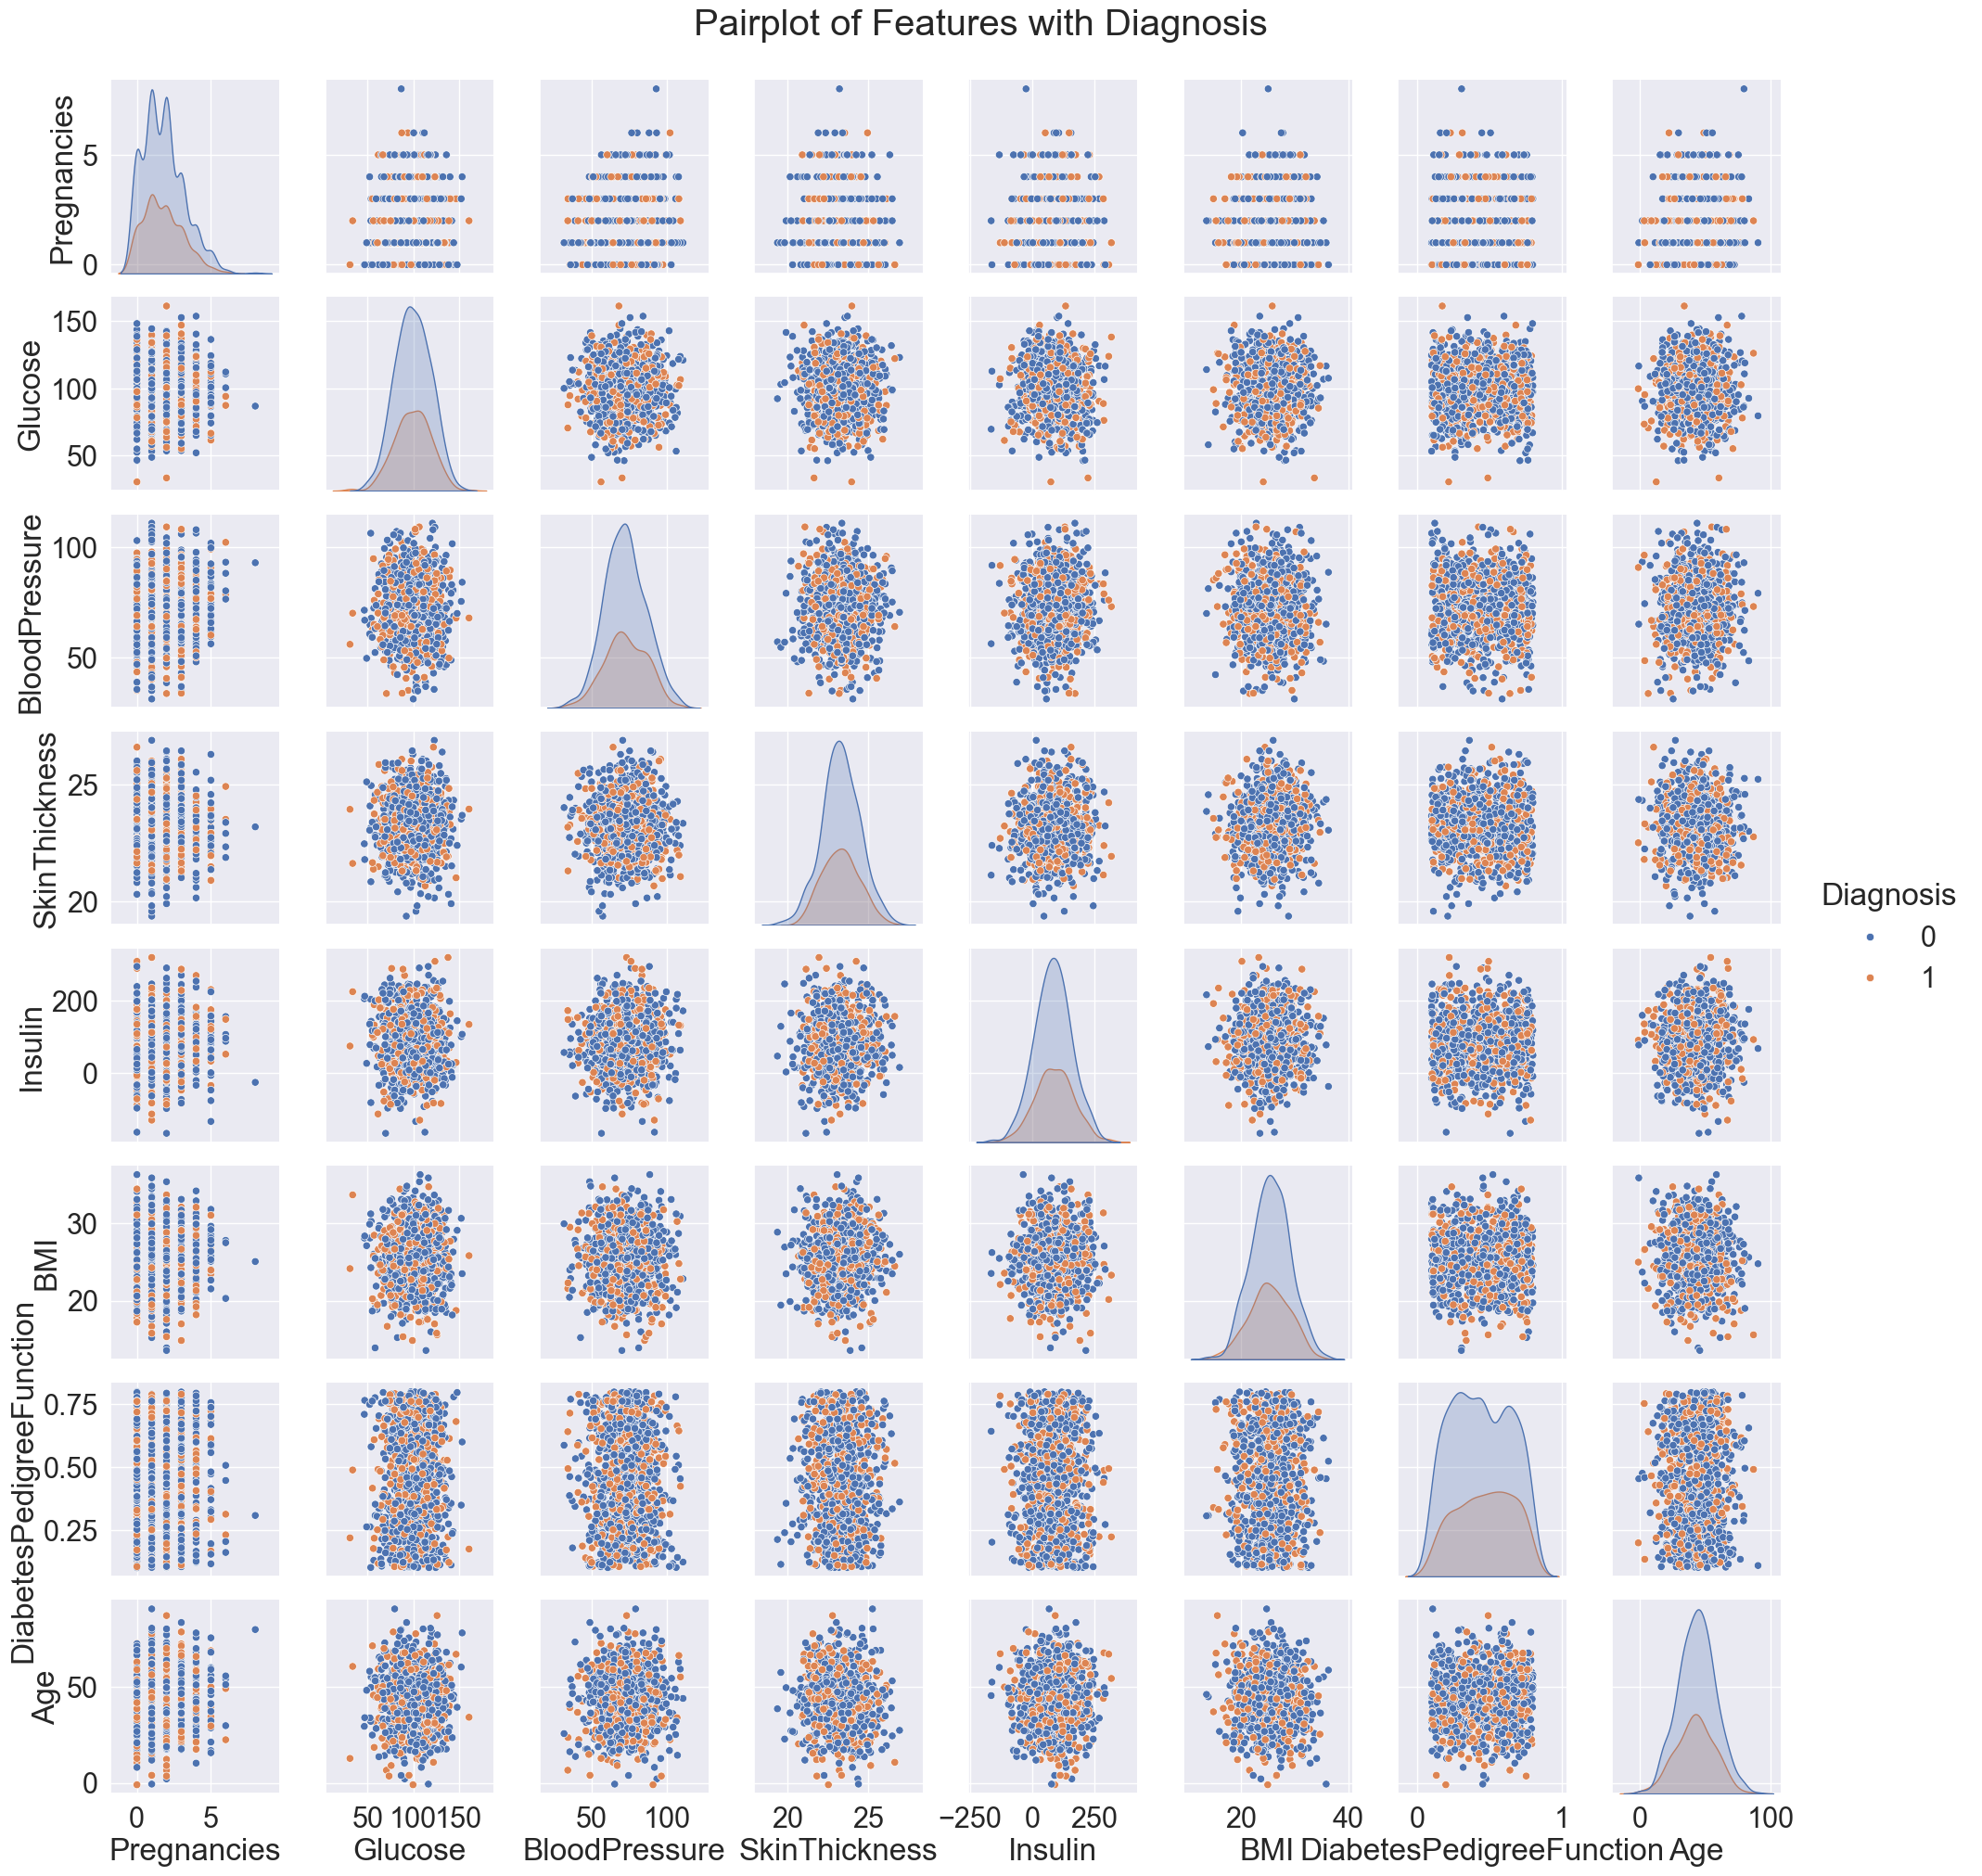

In [28]:
sns.set(font_scale=2)
pairplot = sns.pairplot(df, hue='Diagnosis', )

# Add a title
pairplot.fig.suptitle("Pairplot of Features with Diagnosis", y=1.02)
plt.show()

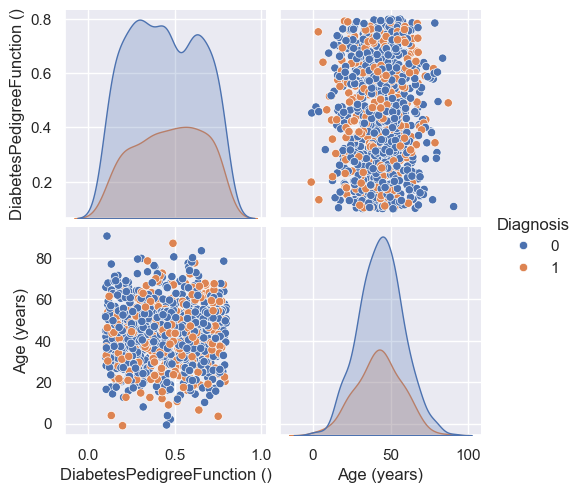

In [56]:
units = {
    'Age': 'years',
}

# Set font scale
sns.set(font_scale=1)

# Specify the variables of interest
variables_of_interest = ['DiabetesPedigreeFunction', 'Age', 'Diagnosis']

# Create pair plot for the specified variables
pairplot = sns.pairplot(df[variables_of_interest], hue='Diagnosis')

# Add units to the axes labels
for ax in pairplot.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    ax.set_xlabel(f"{xlabel} ({units.get(xlabel, '')})")
    ax.set_ylabel(f"{ylabel} ({units.get(ylabel, '')})")

# Show the plot
plt.show()


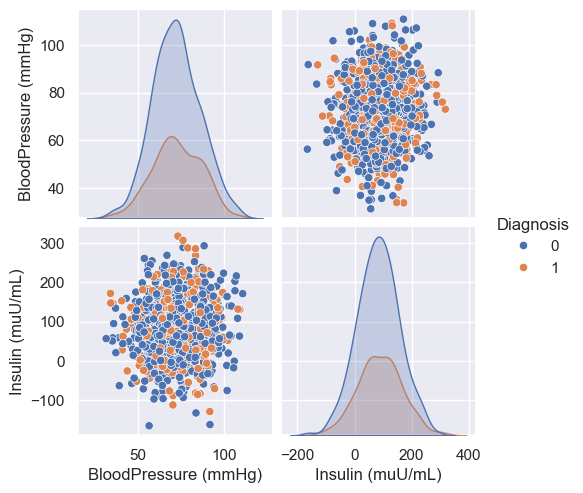

In [54]:
units = {
    'BloodPressure': 'mmHg',
    'Insulin': 'muU/mL'
}

# Set font scale
sns.set(font_scale=1)

# Specify the variables of interest
variables_of_interest = ['BloodPressure', 'Insulin', 'Diagnosis']

# Create pair plot for the specified variables
pairplot = sns.pairplot(df[variables_of_interest], hue='Diagnosis')

# Add units to the axes labels
for ax in pairplot.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    ax.set_xlabel(f"{xlabel} ({units.get(xlabel, '')})")
    ax.set_ylabel(f"{ylabel} ({units.get(ylabel, '')})")

# Show the plot
plt.show()

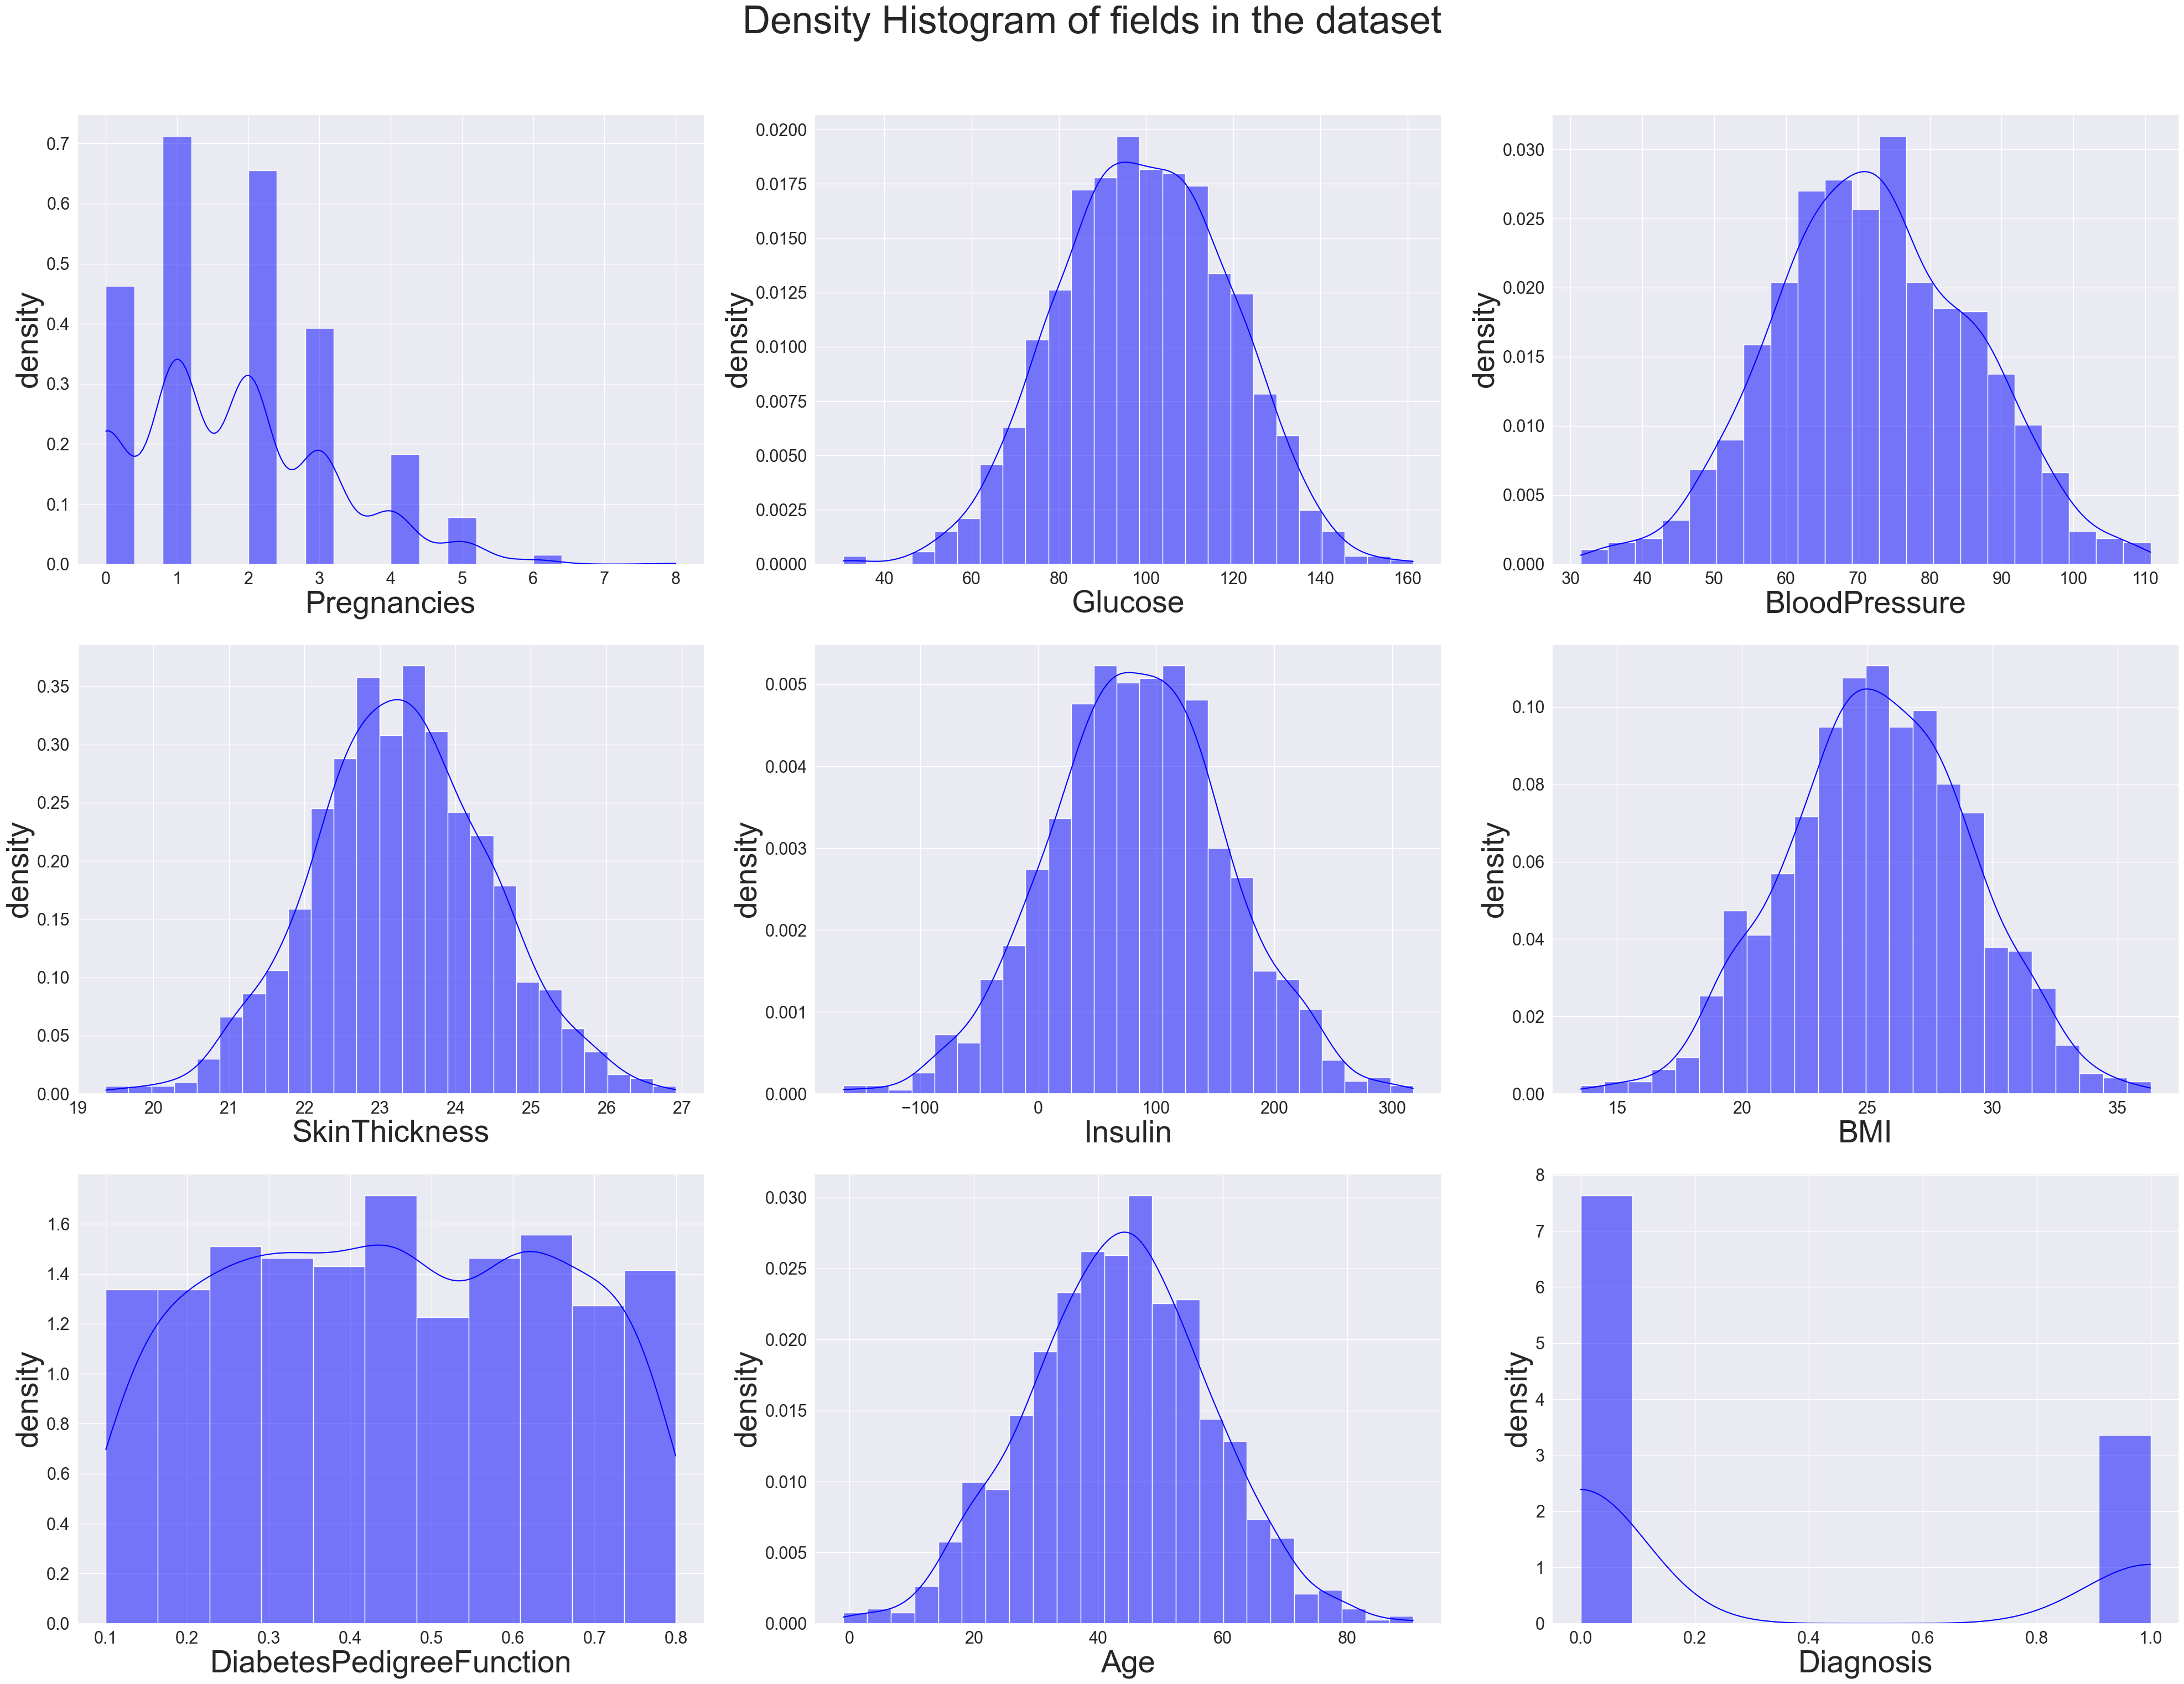

In [11]:
fig , axes = plt.subplots(3,3,figsize=(40,30))
index = 0
axes = axes.flatten()
for col , val in df.items():
    col_dist = sns.histplot(val , ax = axes[index] , kde = True , color = 'blue' , stat="density")
    col_dist.set_xlabel(col, fontsize=40)  
    col_dist.set_ylabel('density', fontsize=40)  
    index += 1  
fig.suptitle("Density Histogram of fields in the dataset", fontsize=50, y=1.02)
plt.tight_layout()

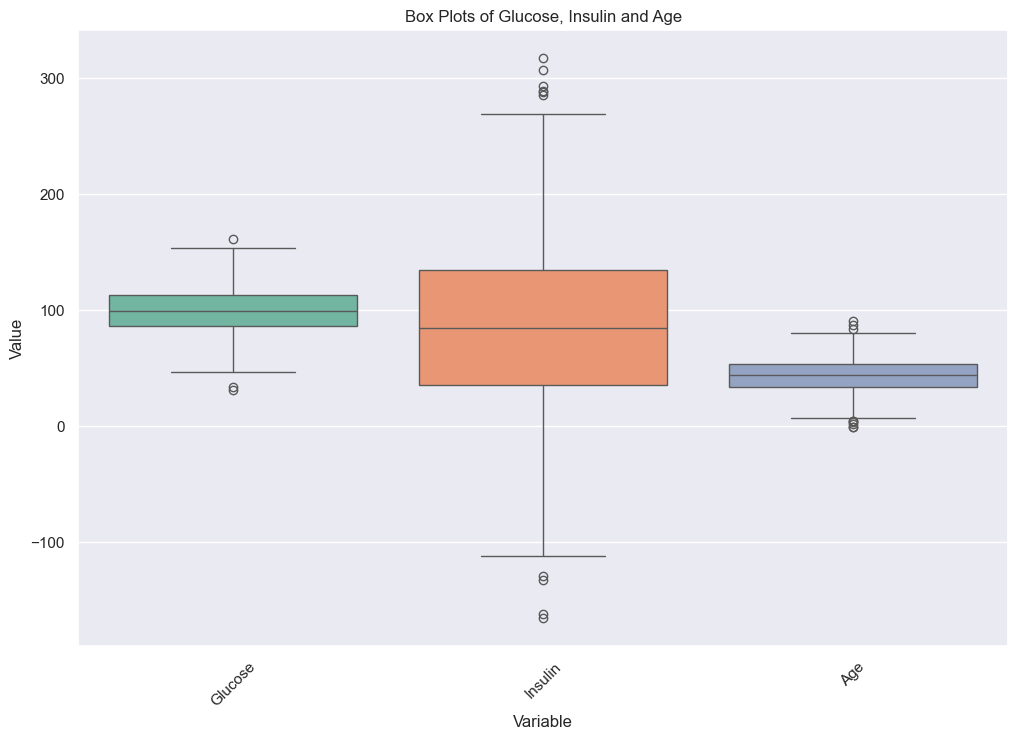

In [43]:
selected_variables = ['Glucose', 'Insulin', 'Age']

# Creating box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_variables], orient="v", palette="Set2")
plt.title("Box Plots of Glucose, Insulin and Age")
plt.ylabel("Value")
plt.xlabel("Variable")
plt.xticks(rotation=45)
plt.show()

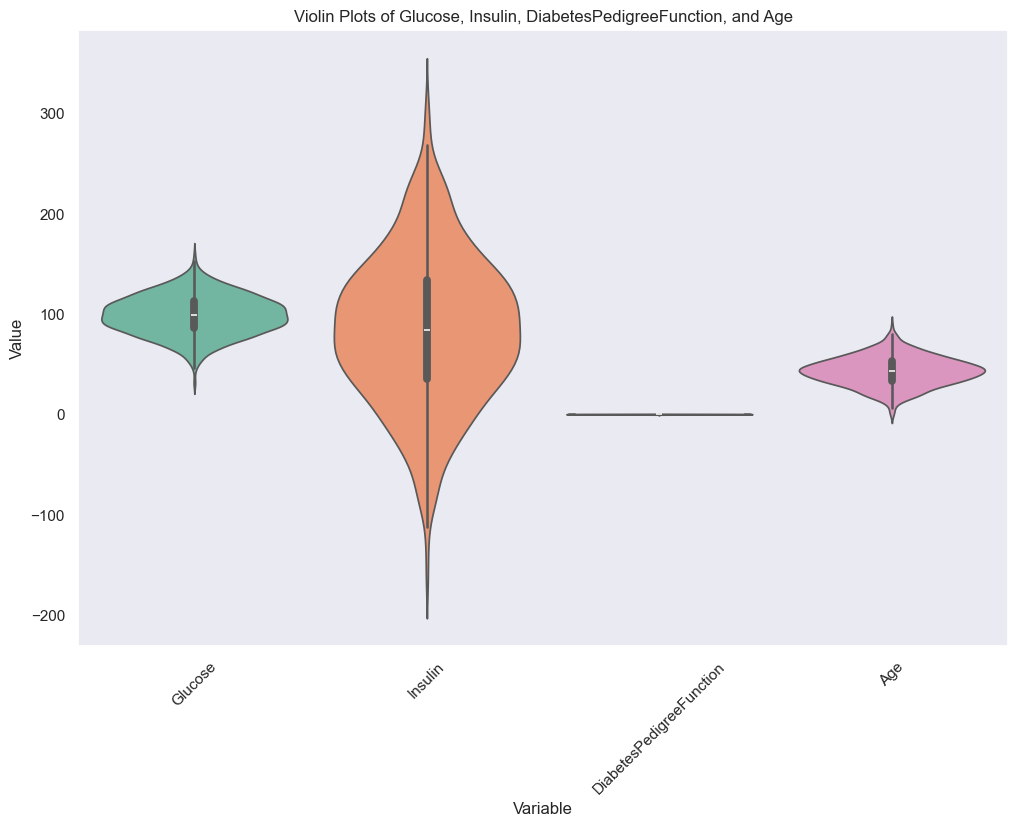

In [46]:
sns.set_style("dark")

# Selecting variables for violin plots
selected_variables = ['Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

# Creating violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[selected_variables], palette="Set2")
plt.title("Violin Plots of Glucose, Insulin, DiabetesPedigreeFunction, and Age")
plt.ylabel("Value")
plt.xlabel("Variable")
plt.xticks(rotation=45)
plt.show()

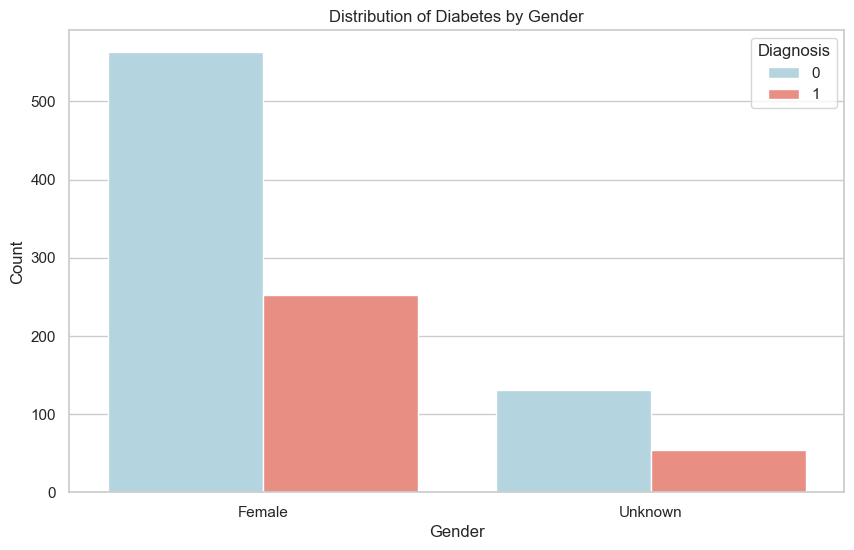

In [52]:
def classify_gender(row):
    if row['Pregnancies'] > 0:
        return 'Female'
    else:
        return 'Unknown'

df['Gender'] = df.apply(classify_gender, axis=1)

# Group data by 'Diagnosis' and 'Gender', count occurrences, and reset index
gender_diagnosis_counts = df.groupby(['Diagnosis', 'Gender']).size().reset_index(name='Count')

# Define custom colors for the bar graph
custom_palette = {0: 'lightblue', 1: 'salmon'}

# Plot the bar graph with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_diagnosis_counts, x='Gender', y='Count', hue='Diagnosis', palette=custom_palette)
plt.title('Distribution of Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()